## Alzheimer Image Classification using CNN

Given *MRI Alzheimer*, let's try to predict which **Alzheimer** is present in a given image.

We will use a TensorFlow/Keras convolutional neural network to make our predictions.

# Getting Started

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_df = pd.read_csv('alzheimer_train_valid.csv')
test_df = pd.read_csv("alzheimer_benchamrk.csv")

In [3]:
test_df

,image_path,class
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented
...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented


In [4]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [5]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='class',
    target_size=(224, 224),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='class',
    target_size=(224, 224),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='class',
    target_size=(224, 224),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=4,
    shuffle=False
)

Found 10176 validated image filenames belonging to 4 classes.
Found 2543 validated image filenames belonging to 4 classes.
Found 600 validated image filenames belonging to 4 classes.


In [6]:
inputs = tf.keras.Input(shape=(224, 224, 1))
x = tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=10,
                                                restore_best_weights=True)])

Epoch 1/100
2544/2544 [==============================] - 51s 20ms/step - loss: 1.1952 - accuracy: 0.4258 - val_loss: 1.3839 - val_accuracy: 0.3504
Epoch 2/100
2544/2544 [==============================] - 49s 19ms/step - loss: 1.0862 - accuracy: 0.4531 - val_loss: 1.0496 - val_accuracy: 0.4558
Epoch 3/100
2544/2544 [==============================] - 50s 20ms/step - loss: 1.0468 - accuracy: 0.4687 - val_loss: 1.0783 - val_accuracy: 0.4506
Epoch 4/100
2544/2544 [==============================] - 51s 20ms/step - loss: 1.0258 - accuracy: 0.4843 - val_loss: 1.0102 - val_accuracy: 0.4880
Epoch 5/100
2544/2544 [==============================] - 50s 20ms/step - loss: 1.0096 - accuracy: 0.4847 - val_loss: 0.9937 - val_accuracy: 0.4908
Epoch 6/100
2544/2544 [==============================] - 49s 19ms/step - loss: 0.9962 - accuracy: 0.5011 - val_loss: 0.9795 - val_accuracy: 0.5265
Epoch 7/100
2544/2544 [==============================] - 50s 19ms/step - loss: 0.9884 - accuracy: 0.5072 - val_loss: 0

In [7]:
confidence = model.predict(test_images)

150/150 [==============================] - 1s 7ms/step


In [8]:
ss = pd.DataFrame(confidence, columns = test_images.class_indices)

In [9]:
confidence = model.predict(test_images)
ss['predict'] = np.argmax(model.predict(test_images), axis=1)

150/150 [==============================] - 1s 7ms/step


In [10]:
ss

,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented,predict
0,0.029197,0.000001,5.712956e-01,0.399507,2
1,0.005127,0.000006,7.414617e-01,0.253406,2
2,0.594340,0.003879,2.611849e-08,0.401781,0
3,0.465298,0.251558,5.679717e-05,0.283086,0
4,0.073427,0.920977,2.093489e-09,0.005597,1
...,...,...,...,...,...
595,0.473609,0.006074,1.026264e-01,0.417690,0
596,0.067637,0.009676,4.236227e-01,0.499064,3
597,0.426480,0.268955,1.185470e-05,0.304553,0
598,0.184635,0.786269,5.986738e-08,0.029096,1


In [11]:
reverse_mapping_dict = {v: k for k, v in test_images.class_indices.items()}
ss['predict'] = ss['predict'].map(reverse_mapping_dict)

In [12]:
ss

,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented,predict
0,0.029197,0.000001,5.712956e-01,0.399507,Non_Demented
1,0.005127,0.000006,7.414617e-01,0.253406,Non_Demented
2,0.594340,0.003879,2.611849e-08,0.401781,Mild_Demented
3,0.465298,0.251558,5.679717e-05,0.283086,Mild_Demented
4,0.073427,0.920977,2.093489e-09,0.005597,Moderate_Demented
...,...,...,...,...,...
595,0.473609,0.006074,1.026264e-01,0.417690,Mild_Demented
596,0.067637,0.009676,4.236227e-01,0.499064,Very_Mild_Demented
597,0.426480,0.268955,1.185470e-05,0.304553,Mild_Demented
598,0.184635,0.786269,5.986738e-08,0.029096,Moderate_Demented


In [13]:
results = model.evaluate(test_images, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 67.00%


In [14]:
predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

150/150 [==============================] - 1s 7ms/step


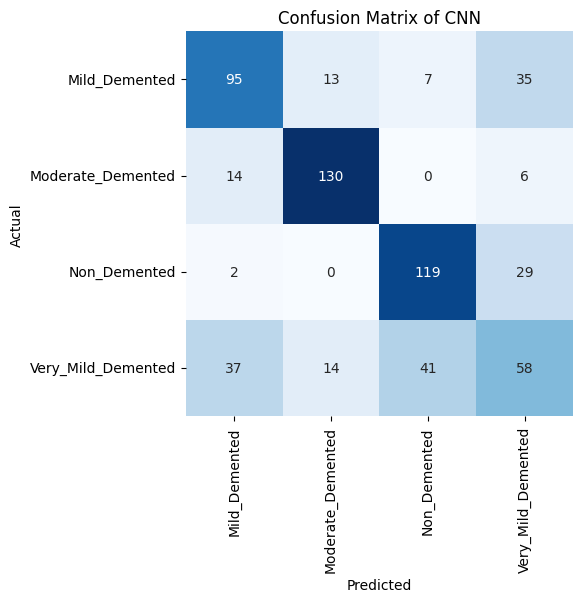

In [15]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of CNN")
plt.show()

In [16]:
print("CNN Classification Report:\n----------------------\n", clr)

CNN Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.64      0.63      0.64       150
 Moderate_Demented       0.83      0.87      0.85       150
      Non_Demented       0.71      0.79      0.75       150
Very_Mild_Demented       0.45      0.39      0.42       150

          accuracy                           0.67       600
         macro avg       0.66      0.67      0.66       600
      weighted avg       0.66      0.67      0.66       600



----------------------------

In [17]:
cnn_alzheimer_results = pd.concat([test_df, ss], axis = 1)[['image_path', 'class', 'predict', 
                                                            'Mild_Demented', 'Moderate_Demented',
                                                            'Non_Demented', 'Very_Mild_Demented']]

In [18]:
cnn_alzheimer_results

,image_path,class,predict,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,Non_Demented,0.029197,0.000001,5.712956e-01,0.399507
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,Non_Demented,0.005127,0.000006,7.414617e-01,0.253406
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,Mild_Demented,0.594340,0.003879,2.611849e-08,0.401781
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,Mild_Demented,0.465298,0.251558,5.679717e-05,0.283086
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,Moderate_Demented,0.073427,0.920977,2.093489e-09,0.005597
...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,Mild_Demented,0.473609,0.006074,1.026264e-01,0.417690
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,Very_Mild_Demented,0.067637,0.009676,4.236227e-01,0.499064
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,Mild_Demented,0.426480,0.268955,1.185470e-05,0.304553
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,Moderate_Demented,0.184635,0.786269,5.986738e-08,0.029096


In [19]:
cnn_alzheimer_results.to_csv('results_confidence/cnn_results_confidence.csv', index = False)